In [4]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
# Definimos el sistema de ecuaciones
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), 
           x * (rho - z) - y,
           x * y - beta * z]

# Asignamos valores a los parámetros
sigma, rho, beta = 8, 28, 8/3.0

# Condición inicial y valores de t sobre los que calcular
xyz0 = [1.0, 1.0, 1.0]
t = np.linspace(0, 25, 10000)

# Resolvemos las ecuaciones
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

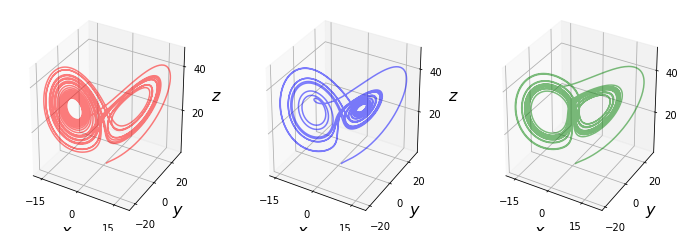

In [5]:
# Graficamos las soluciones
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4),
                                  subplot_kw={'projection':'3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

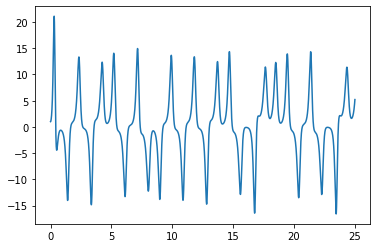

In [6]:
plt.plot(t,xyz[:,0])

Aqui iria nuestra presentacion, si tan solo hubiesemos entendido el tema...

<IPython.core.display.Javascript object>


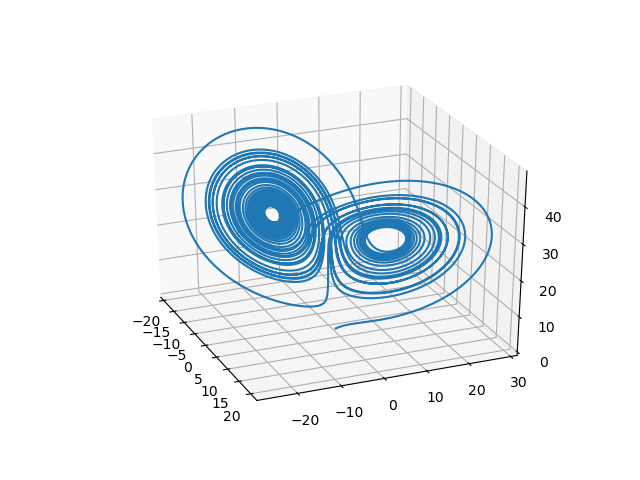

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

def f(t,x):
    a=10.0
    b=28.0
    c=8/3
    return np.array([a*(x[1]-x[0]),x[0]*(b-x[2])-x[1],x[0]*x[1]-c*x[2]])

t0=0
x0=np.array([3,0,0])

tn=40
h=0.001

n=round((tn-t0)/h)
t=np.linspace(t0,tn,n+1)
x=np.zeros((n+1,len(x0)))
x[0,:]=x0

for i in range(n):
    k1=h*f(t[i],x[i,:])
    k2=h*f(t[i]+h/2,x[i,:]+k1/2)
    k3=h*f(t[i]+h/2,x[i,:]+k2/2)
    k4=h*f(t[i]+h,x[i,:]+k3)
    x[i+1,:]=x[i,:]+(1/6)*(k1+2*k2+2*k3+k4)

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot3D(x[:,0],x[:,1],x[:,2])
plt.show()